# Description
### previous notebook: http://localhost:8888/notebooks/coupling_analysis/draw_freestyle_correlations_using_recursive.ipynb
### Next notebook: http://localhost:8888/notebooks/coupling_analysis/score_drumming_draft.ipynb

### This notebook looks for offhand relationships in HR across the two "interactive" sessions 
### * Looks at the 2D representation of the HR coupling in one session against the other.
### * Same relationship, visualized through the difference vector.
### OLAP data file: `olap2.pickle`

In [1]:
import recursive as sv
import pickle
from os import path
import numpy as np
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from importlib import reload
reload(sv)

<module 'recursive' from '/home/siegman/packages/recursive_store/recursive.py'>

In [3]:
data_dir = path.join(*(['..']*3+['data','time_series_linear_interpolations']))
path.exists(data_dir)

True

### Load `svdata`

In [4]:
with open(path.join(data_dir,'olap2.pickle'),'rb') as a:
    svdata = pickle.load(a)

In [5]:
two_session_data_by_group =[(gr_id,dat.sessions[1], dat.sessions[3]) for gr_id,dat in zip(svdata.group_id,svdata.coupling_2d.remez.tolist()) if dat is not None]

### plot the data for both sessions

In [6]:
import matplotlib.cm as cm

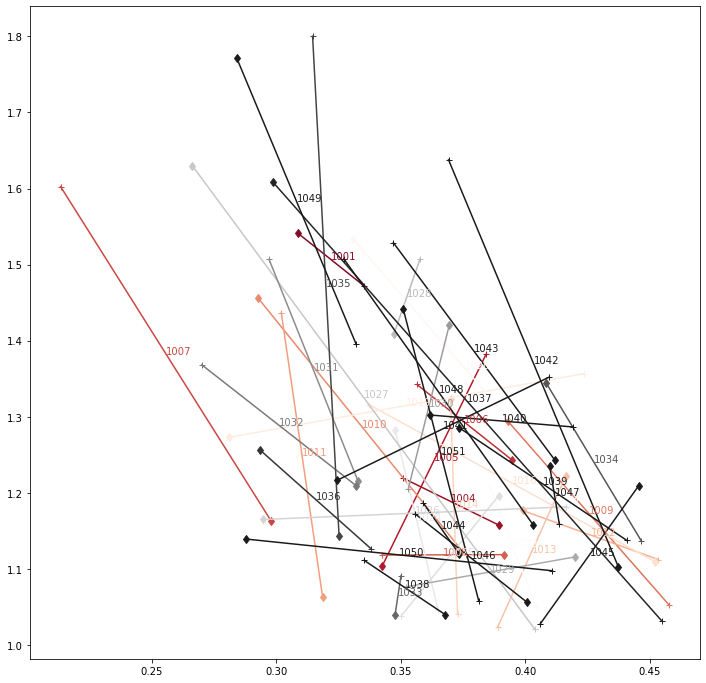

In [7]:
plt.figure(figsize=(12,12))
for i,(gr_id, p1,p2) in enumerate(two_session_data_by_group):
    if not (p1 and p2): # or np.abs(gr_id-1008)>3:
        
        #print(gr_id)
        continue
    x = [p1[0],p2[0]]
    y =[p1[1],p2[1]]
    
    plt.plot(x,y ,'-', color=cm.RdGy(i*8+10))
    plt.plot(x[0],y[0],'+',color=cm.RdGy(i*8+10))
    plt.plot(x[1],y[1],'d', color=cm.RdGy(i*8+10))
    plt.text(sum(x)/2, sum(y)/2,str(gr_id),fontdict={'color': cm.RdGy(i*8+10)})
    

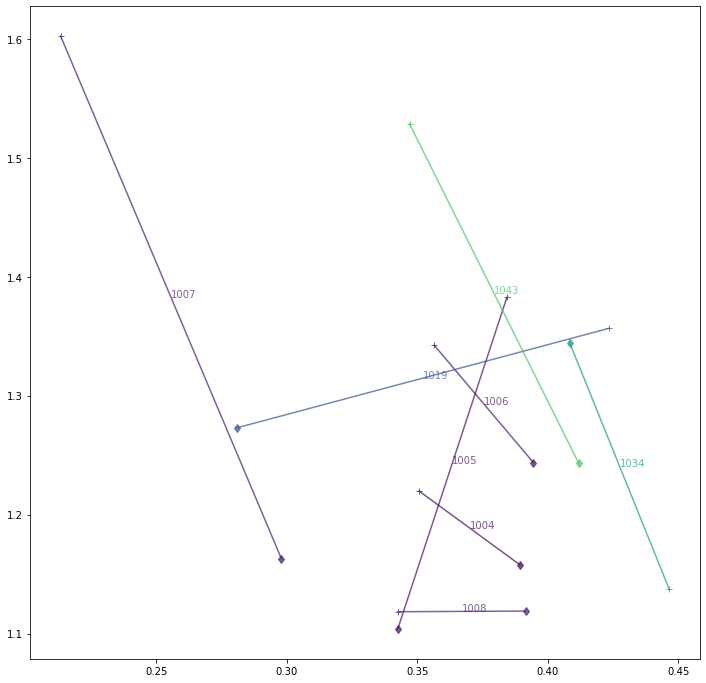

In [20]:
clr = lambda x: cm.viridis(x,0.7)
plt.figure(figsize=(12,12))
for i,(gr_id, p1,p2) in enumerate(two_session_data_by_group):
    if not (p1 and p2) or gr_id not in (1004, 1005,1006, 1007, 1034,1043, 1019, 1008): # or np.abs(gr_id-1008)>3:
        
        #print(gr_id)
        continue
    x = [p1[0],p2[0]]
    y =[p1[1],p2[1]]
    
    plt.plot(x,y ,'-', color=clr(i/50))
    plt.plot(x[0],y[0],'+',color=clr(i/50.))
    plt.plot(x[1],y[1],'d', color=clr(i/50.))
    plt.text(sum(x)/2, sum(y)/2,str(gr_id),fontdict={'color': clr(i/50)})
    

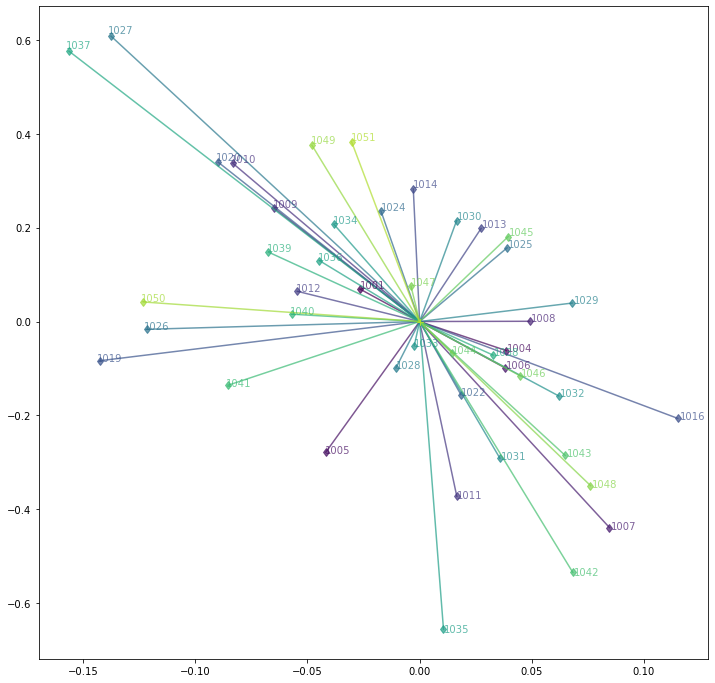

In [15]:
clr = lambda x: cm.viridis(x,0.7)
diff = lambda v: (0,v[1]-v[0])
plt.figure(figsize=(12,12))
for i,(gr_id, p1,p2) in enumerate(two_session_data_by_group):
    if not (p1 and p2): # or np.abs(gr_id-1008)>3:
        
        #print(gr_id)
        continue
    x = [p1[0],p2[0]]
    y =[p1[1],p2[1]]
    
    plt.plot(diff(x),diff(y) ,'-', color=clr(i/50))
    plt.plot(0,0,'+',color=clr(i/50.))
    plt.plot(diff(x)[1],diff(y)[1],'d', color=clr(i/50.))
    plt.text(diff(x)[1]*1.01, diff(y)[1]*1.01,str(gr_id),fontdict={'color': clr(i/50)})
    

In [10]:
two_session_data_by_group

[(1001,
  [0.3352266190463019, 1.47206166533493],
  [0.30865236229458465, 1.5412726626724513]),
 (1004,
  [0.3507211983911607, 1.2198192285257634],
  [0.3893850693685441, 1.1577598096672328]),
 (1005,
  [0.3843317079204323, 1.3826323573894022],
  [0.3424978648894185, 1.1037369607361516]),
 (1006,
  [0.35647247737535087, 1.3425352021670265],
  [0.3945180155242411, 1.2437782157349861]),
 (1007,
  [0.21333445043266766, 1.602406438883338],
  [0.2979630279257565, 1.1628519166274291]),
 (1008,
  [0.3425104547939118, 1.118401081287158],
  [0.3915674530079116, 1.1189302316724807]),
 (1009,
  [0.4578990845316076, 1.052378556778532],
  [0.3930193615969861, 1.294322822987879]),
 (1010,
  [0.3760306454805831, 1.1181367188957547],
  [0.29278804249664886, 1.4555415137744683]),
 (1011,
  [0.301989281827115, 1.4365333376622362],
  [0.3185629772561582, 1.0635898335619067]),
 (1012,
  [0.4534913075880491, 1.1124439403909767],
  [0.39893728434650777, 1.176954052774006]),
 (1013,
  [0.3888532076059578, 1.

### Notes on how to score the drumming
The easiest thing is to score the distance.
if the beat is similar, it should score, then there should be a fast (but not hard) rolloff if the beats are too different.

so we can use Gaussian, the problem is that it doesn't have a wide plateau at the top.
We can use a shifted sigmoid on the squared distance, then we have a width parameter (at what width it goes to &frac12;) and a temperature parameter (the dropoff speed).


This distance can be caluclated for the entire session and then averaged (divided by the length of time).

One metric is to calculate this distance per pair, then we have three such distances in each group.

Another metric is to take the minimal and the maximal signal at each point in time, and run the metric on these two "signals". This would give a "harder" group score



In [11]:
svdata[0].drumming


dict_store {'sessions': list_store (None, list_store (dict_store {'drummer': 43, 'participant_id': 103, 'signal_4hz': [[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, ...}
, dict_store {'drummer': 45, 'participant_id': 102, 'signal_4hz': [[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, ...}
, dict_store {'drummer': 48, 'participant_id': 101, 'signal_4hz': [[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, ...}
)
, None, list_store (dict_store {'drummer': 43, 'participant_id': 103, 'signal_4hz': [[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, ...}
, dict_store {'drummer': 45, 'participant_id': 102, 'signal_4hz': [[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, ...}
, dict_store {'drummer': 48, 'participant_id': 101, 'signal_4hz': [[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, ...}
)
)
}

In [12]:
from scipy.special import expit

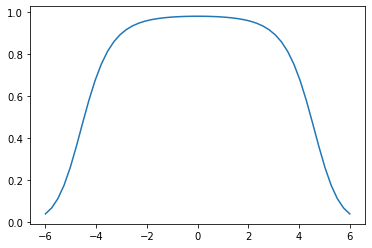

In [13]:
a = 0.2
s = 4
x = np.linspace(-6,6,50)
plt.plot(x, 1-expit(a*x**2-s))